# RL and Q-learning Overivew


## The Theoretical Bedrock: Understanding the Action-Value Function

Before an agent can calculate a Q-value, it is essential to understand what this value represents. The action-value function, denoted as $Q(s, a)$, is a prediction of the total future discounted reward an agent can expect to receive if it starts in a particular state $s$, takes a specific action $a$, and then follows an optimal policy from that point forward.[9, 10, 11] It quantifies the "quality" of an action in a given state by balancing immediate gains with long-term strategic outcomes, allowing the agent to effectively "think ahead".[10, 12]

The primary goal of an RL agent is to maximize its cumulative future reward, a quantity known as the return.[7, 13] However, rewards that are further in the future are typically less certain and thus less valuable than immediate rewards. This preference is mathematically formalized using a **discount factor**, denoted by $\gamma$ (gamma), which is a value between 0 and 1.[10, 11] A $\gamma$ value of 0 would make an agent "myopic," caring only about the immediate reward, whereas a value close to 1 would make it "farsighted," giving significant weight to rewards far in the future.[14]

The theoretical foundation for Q-values is the **Bellman Optimality Equation**, a recursive formula that defines the value of an optimal policy.[15, 16] For the optimal action-value function, $Q^*(s, a)$, the equation is expressed as:

$$Q^*(s, a) = \mathbb{E}$$

This equation asserts that the optimal value of taking action $a$ in state $s$ is the sum of the expected immediate reward ($R_{t+1}$) and the discounted maximum Q-value that can be achieved from the next state, $S_{t+1}$.[12, 16] The maximization operator ($\max_{a'}$) is the key to optimality; it signifies that in calculating the value of the current action, we assume that in the subsequent state, the agent will always choose the action that yields the highest possible future value.[17, 18]

It is most powerful to view the Bellman equation not as a single formula, but as a large system of simultaneous equations, with one equation for every state-action pair in the environment. The optimal Q-values represent the unique solution to this system, where the value of every state-action pair is perfectly consistent with the values of its potential successors. This perspective clarifies why iterative algorithms like Q-learning are effective. They begin with an arbitrary, inconsistent set of Q-values and repeatedly apply an update rule derived from the Bellman equation. Each update pushes the value of a single $Q(s, a)$ closer to being consistent with its successors. Over thousands of iterations, these local adjustments propagate throughout the system, eventually causing the entire set of values to converge to the globally self-consistent solution.

The discount factor $\gamma$ serves a deeper purpose beyond simply prioritizing near-term rewards. First, it is a mathematical necessity for tasks that could continue indefinitely (non-episodic tasks). Without discounting, the sum of future rewards could diverge to infinity, making it impossible to compare different policies. A discount factor less than 1 ensures that the infinite sum of rewards converges to a finite value, rendering the problem mathematically tractable.[13, 14] Second, $\gamma$ acts as a practical tool for managing uncertainty. Predictions about the distant future are inherently less reliable than those about the immediate future. By down-weighting far-future rewards, the discount factor implicitly encodes this uncertainty into the value function, leading to more robust policies that rely more heavily on predictable, near-term outcomes.

## The Q-Learning Algorithm: An Iterative Approach to Optimality

The Bellman equation defines what the optimal Q-values are, but it does not specify how to find them, especially when the environment's dynamics (transition probabilities and reward functions) are unknown. The Q-learning algorithm provides a practical, model-free method to iteratively approximate these optimal values through trial and error.[19, 20] It is a form of Temporal Difference (TD) learning, meaning it updates its value estimates based on other learned estimates (a process known as bootstrapping) without waiting for the final outcome of an episode.[19, 21]

The core of the algorithm is the **Q-learning update rule**. After being in state $s$, taking action $a$, receiving reward $r$, and observing the next state $s'$, the agent updates its estimate for $Q(s, a)$ using the following formula [11, 22, 23]:

$$Q_{new}(s, a) \leftarrow Q_{old}(s, a) + \alpha \cdot [r + \gamma \max_{a'} Q(s', a') - Q_{old}(s, a)]$$

This update is composed of several key components:

  * **$\alpha$ (Alpha, the Learning Rate):** A hyperparameter between 0 and 1 that determines the extent to which new information overrides the old estimate. A high learning rate allows for faster learning but can lead to instability, while a low learning rate ensures more stable but slower convergence.[19, 22, 24]
  * **$r + \gamma \max_{a'} Q(s', a')$ (The TD Target):** This term represents a new, improved estimate of the value of $Q(s, a)$ based on the most recent experience. It combines the immediate reward $r$ with the discounted best possible value obtainable from the next state $s'$.[15, 21]
  * **$[r + \gamma \max_{a'} Q(s', a') - Q_{old}(s, a)]$ (The TD Error):** This is the difference between the new TD Target and the agent's previous estimate. It serves as the primary learning signal; the update rule adjusts the old Q-value in the direction that reduces this error.[21, 25]

For environments with a finite and manageable number of states and actions, such as the "Toy Text" environments in Gymnasium, these Q-values can be stored in a simple data structure called a **Q-table**. This is typically a two-dimensional array where rows represent states and columns represent actions, with each cell storing the corresponding Q-value.[10, 19, 26] The learning process involves initializing this table (often with all zeros) and then iteratively updating its entries using the Q-learning rule as the agent interacts with the environment.[17, 27]

A critical feature of Q-learning is that it is an **off-policy** algorithm.[11, 22] The specific mechanism enabling this is the $\max_{a'} Q(s', a')$ term in the update rule. An agent often follows an exploratory policy (e.g., epsilon-greedy) where it sometimes takes random, non-optimal actions to discover new pathways. However, when updating its value function, the algorithm does not use the Q-value of the action that was *actually taken* in the next state. Instead, it uses the Q-value of the *best possible action* it could have taken. This decouples the policy being learned (the optimal, greedy policy implied by the `max` operator) from the policy used to generate behavior (the exploratory policy). This decoupling significantly improves data efficiency, as the agent can learn about the optimal path even from experiences generated by suboptimal exploratory actions.

A more nuanced understanding of the learning rate $\alpha$ can be gained by rewriting the update rule as $Q(s,a) \leftarrow (1-\alpha)Q(s,a) + \alpha$.[15] This form reveals that the new Q-value is a weighted average of the old value and the new target—the formula for an exponential moving average. From this perspective, the agent is not merely correcting errors but continuously maintaining a running average of the expected returns for each state-action pair. A high $\alpha$ early in training allows this average to change rapidly based on new experiences, while a decaying $\alpha$ later in training allows the average to stabilize as the agent's estimates become more confident.

### Table 1: Breakdown of the Q-Learning Update Rule Components

| Component | Symbol | Description | Role in Calculation | Source Snippets |
| :--- | :--- | :--- | :--- | :--- |
| **Learning Rate** | $\alpha$ | A value between 0 and 1 that controls the step size of the update. | Determines how much the new TD Target influences the existing Q-value. A higher $\alpha$ means faster learning but potential instability. | [11, 19, 22] |
| **Immediate Reward** | $r$ | The scalar reward returned by the Gymnasium `env.step()` function after taking action $a$ in state $s$. | Provides the immediate, real feedback from the environment, grounding the learning process in actual experience. | [7, 22] |
| **Discount Factor** | $\gamma$ | A value between 0 and 1 that determines the importance of future rewards. | Discounts the value of the next state's potential rewards, balancing short-term and long-term gains. | [10, 11, 14] |
| **Old Q-Value** | $Q_{old}(s, a)$ | The agent's current estimate of the value of taking action $a$ in state $s$ before the update. | The baseline value that is being improved upon. | [22, 28] |
| **Max Q-value (Next State)** | $\max_{a'} Q(s', a')$ | The maximum Q-value for the next state $s'$ across all possible next actions $a'$. | Represents the agent's estimate of the optimal future value from the next state. This is the "bootstrapping" step. | [10, 17, 19] |
| **TD Target** | $r + \gamma \max_{a'} Q(s', a')$ | The sum of the immediate reward and the discounted optimal future value. | A new, improved estimate for $Q(s, a)$ based on the latest one-step lookahead. This is what the algorithm aims to learn. | [15, 21] |
| **TD Error** | $\text{TD Target} - Q_{old}(s, a)$ | The difference between the TD Target and the old Q-value estimate. | The core learning signal. The update aims to reduce this error over time. | [21, 25] |

## The Agent-Environment Interface: A Foundational Decoupling

The calculation of Q-values in reinforcement learning (RL) is a process that belongs entirely to the learning agent, not the environment it interacts with. This fundamental separation of concerns is a cornerstone of modern RL research, and it is formalized and standardized by the Gymnasium library.[1, 2] Gymnasium, a maintained and updated fork of OpenAI's original Gym, does not implement any specific learning algorithm; rather, it provides a standard Application Programming Interface (API) that governs the communication between an agent and a simulated environment.[1, 3, 4] This design streamlines research by ensuring that any compliant algorithm can be tested on any compliant environment, allowing researchers to innovate on learning strategies rather than reimplementing interaction logic.[2, 5]

The core of this interaction is defined by the `Env` class and its primary methods: `reset()` and `step()`. An agent's lifecycle within a Gymnasium environment begins with instantiation via `gymnasium.make("Environment-vX")`.[3, 6] An episode is then initiated by calling `env.reset()`, which returns an initial `observation` of the environment's state.[6, 7] From this point, the agent and environment engage in a turn-based loop orchestrated by the `env.step(action)` method. The agent selects an action and passes it to `step()`, which processes the action, updates the environment's internal state, and returns a tuple of five crucial pieces of information: `(observation, reward, terminated, truncated, info)`.[1, 3, 6]

This return tuple constitutes the entirety of the feedback the agent receives. It includes:

  * **`observation`**: The new state of the environment as perceived by the agent after its action.
  * **`reward`**: A scalar value indicating the immediate desirability of the state-action pair.
  * **`terminated`**: A boolean flag that is `True` if the episode has ended due to a natural conclusion defined by the task (e.g., winning a game or failing a task like the pole falling in CartPole).
  * **`truncated`**: A boolean flag that is `True` if the episode has ended for an external reason, such as a time limit, not a failure condition.
  * **`info`**: A dictionary containing auxiliary diagnostic information not intended for use by the learning algorithm.

The role of Gymnasium concludes upon returning this tuple. The library contains no inherent logic for calculating Q-values; that is the exclusive responsibility of the agent's algorithm.[8] This deliberate decoupling is a powerful design choice that has fostered a rich ecosystem of compatible libraries, such as CleanRL, which provide reference implementations of various learning algorithms.[1]

The structure of the Gymnasium API can be understood as a formalized "contract" for model-free learning. The `step()` function's return tuple is not arbitrary; it is meticulously designed to provide the exact components required by foundational RL update rules. The `reward` corresponds to the $r$ term in the Bellman equation, the new `observation` is the next state $s'$, and the `terminated` flag signals when the accumulation of rewards for an episode should cease. This design guarantees that any agent built to consume this specific tuple of information will have sufficient data to learn, enabling the powerful agent-environment separation that defines the field.

Furthermore, the API's use of the term `observation` rather than `state` implicitly endorses a more general and powerful framework. An `Env` in Gymnasium is described as roughly corresponding to a Partially Observable Markov Decision Process (POMDP).[5] In a classic Markov Decision Process (MDP), the agent is assumed to have access to the complete, true state of the environment. A POMDP, however, acknowledges that the agent's perception may be an incomplete or noisy view of the true state. By providing an `observation`, the Gymnasium API does not enforce the assumption of full observability. This makes the standard seamlessly applicable to both simple problems like "FrozenLake," where the observation is the state, and highly complex problems like Atari games, where the observation is a screen of pixels that only partially reveals the underlying game state. This generality is a key factor in Gymnasium's widespread adoption and utility.

# A Comprehensive Analysis of Q-Value Calculation within the Gymnasium Reinforcement Learning Framework

## The Synthesis: A Practical Walkthrough of Q-Value Calculation with Gymnasium

This section synthesizes the preceding concepts into a practical, step-by-step demonstration of how an agent uses the Gymnasium API to perform Q-value calculations. The process shows how the abstract theory is implemented in code, using the feedback from the environment to iteratively improve the Q-table.

### Algorithm Setup

1.  **Import Libraries and Instantiate Environment:** The process begins by importing the necessary libraries and creating an instance of a Gymnasium environment, such as `Taxi-v3`, which has a discrete state and action space suitable for tabular Q-learning.[24, 29]
    ```python
    import gymnasium as gym
    import numpy as np
    env = gym.make("Taxi-v3")
    ```
2.  **Define Hyperparameters:** Key parameters that govern the learning process are defined. These include the learning rate (`alpha`), the discount factor (`gamma`), and parameters for the exploration strategy, such as `epsilon` for an epsilon-greedy policy.[24, 29]
    ```python
    alpha = 0.4
    gamma = 0.6
    epsilon = 1.0
    ```
3.  **Initialize Q-Table:** A Q-table is created to store the action-values. Its dimensions are determined by the size of the environment's observation and action spaces, retrieved via `env.observation_space.n` and `env.action_space.n`. The table is typically initialized with zeros.[17, 29]
    ```python
    q_table = np.zeros([env.observation_space.n, env.action_space.n])
    ```

### The Training Loop

The agent learns by running through many episodes. The following steps describe the logic within a single episode:

1.  **Reset the Environment:** Each episode starts with a call to `env.reset()`, which returns the initial state.[6, 27]
    ```python
    state, info = env.reset()
    done = False
    ```
2.  **Loop Until Episode Ends:** The agent-environment interaction continues in a loop until the environment signals that the episode is over (`terminated` or `truncated` is `True`).
    ```python
    while not done:
    ```
3.  **Choose an Action:** The agent selects an action based on its current policy. An epsilon-greedy strategy balances exploration (choosing a random action) and exploitation (choosing the action with the highest current Q-value).[25, 29]
    ```python
    if np.random.uniform(0, 1) < epsilon:
        action = env.action_space.sample() # Explore
    else:
        action = np.argmax(q_table[state]) # Exploit
    ```
4.  **Take a Step in the Environment:** The chosen action is passed to `env.step()`, and the agent receives the crucial feedback tuple.[6, 29]
    ```python
    next_state, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated
    ```
5.  **THE CALCULATION STEP:** This is the core of the process, where the Q-value is updated. The agent uses the information returned from `env.step()` to execute the Q-learning update rule.
    ```python
    # Retrieve the old Q-value
    old_value = q_table[state, action]

    # Find the maximum Q-value for the next state
    next_max = np.max(q_table[next_state])

    # Calculate the new Q-value using the update rule
    new_value = old_value + alpha * (reward + gamma * next_max - old_value)

    # Update the Q-table
    q_table[state, action] = new_value
    ```
6.  **Update the State:** The agent's current state is updated to the new state, preparing for the next iteration of the loop.[29]
    ```python
    state = next_state
    ```

This entire loop constitutes a data generation process. Each iteration produces a transition tuple `(state, action, reward, next_state)`.[30] In tabular Q-learning, this data point is used once for an immediate update and then discarded. This perspective is foundational for understanding more advanced techniques. For example, the Deep Q-Network algorithm, discussed next, modifies this process by storing these transition tuples in a large "Experience Replay" buffer. Instead of consuming data points as they arrive, the agent samples from this buffer to perform updates, a crucial change that improves learning stability and data efficiency.

# Environment Preparation and Authenticate

In [ ]:
! pip3 install gymnasium

In [ ]:
from google.colab import auth
auth.authenticate_user()

# Define an Agent using Q-learning algorithms

In [ ]:
import gymnasium as gym
from collections import defaultdict
import numpy as np

In [ ]:
class BlackjackAgent:
    def __init__(
        self,
        env: gym.Env,
        learning_rate: float,
        initial_epsilon: float,
        epsilon_decay: float,
        final_epsilon: float,
        discount_factor: float = 0.95,
    ):
        """Initialize a Q-Learning agent.

        Args:
            env: The training environment
            learning_rate: How quickly to update Q-values (0-1)
            initial_epsilon: Starting exploration rate (usually 1.0)
            epsilon_decay: How much to reduce epsilon each episode
            final_epsilon: Minimum exploration rate (usually 0.1)
            discount_factor: How much to value future rewards (0-1)
        """
        self.env = env

        # Q-table: maps (state, action) to expected reward
        # defaultdict automatically creates entries with zeros for new states
        self.q_values = defaultdict(lambda: np.zeros(env.action_space.n))

        self.lr = learning_rate
        self.discount_factor = discount_factor  # How much we care about future rewards

        # Exploration parameters
        self.epsilon = initial_epsilon
        self.epsilon_decay = epsilon_decay
        self.final_epsilon = final_epsilon

        # Track learning progress
        self.training_error = []

    def get_action(self, obs: tuple[int, int, bool]) -> int:
        """Choose an action using epsilon-greedy strategy.

        Returns:
            action: 0 (stand) or 1 (hit)
        """
        # With probability epsilon: explore (random action)
        if np.random.random() < self.epsilon:
            return self.env.action_space.sample()

        # With probability (1-epsilon): exploit (best known action)
        else:
            return int(np.argmax(self.q_values[obs]))

    def update(
        self,
        obs: tuple[int, int, bool],
        action: int,
        reward: float,
        terminated: bool,
        next_obs: tuple[int, int, bool],
    ):
        """Update Q-value based on experience.

        This is the heart of Q-learning: learn from (state, action, reward, next_state)
        """
        # What's the best we could do from the next state?
        # (Zero if episode terminated - no future rewards possible)
        future_q_value = (not terminated) * np.max(self.q_values[next_obs])

        # What should the Q-value be? (Bellman equation)
        target = reward + self.discount_factor * future_q_value

        # How wrong was our current estimate?
        temporal_difference = target - self.q_values[obs][action]

        # Update our estimate in the direction of the error
        # Learning rate controls how big steps we take
        self.q_values[obs][action] = (
            self.q_values[obs][action] + self.lr * temporal_difference
        )

        # Track learning progress (useful for debugging)
        self.training_error.append(temporal_difference)

    def decay_epsilon(self):
        """Reduce exploration rate after each episode."""
        self.epsilon = max(self.final_epsilon, self.epsilon - self.epsilon_decay)

# Train the Agent

In [ ]:
from tqdm import tqdm  # Progress bar
# Training hyperparameters
learning_rate = 0.01        # How fast to learn (higher = faster but less stable)
n_episodes = 1000000        # Number of hands to practice
start_epsilon = 1.0         # Start with 100% random actions
epsilon_decay = start_epsilon / (n_episodes / 2)  # Reduce exploration over time
final_epsilon = 0.1         # Always keep some exploration

In [ ]:
# Create environment and agent
env = gym.make("Blackjack-v1", sab=False)
env = gym.wrappers.RecordEpisodeStatistics(env, buffer_length=n_episodes)

agent = BlackjackAgent(
    env=env,
    learning_rate=learning_rate,
    initial_epsilon=start_epsilon,
    epsilon_decay=epsilon_decay,
    final_epsilon=final_epsilon,
)

for episode in tqdm(range(n_episodes)):
    # Start a new hand
    obs, info = env.reset()
    done = False

    # Play one complete hand
    while not done:
        # Agent chooses action (initially random, gradually more intelligent)
        action = agent.get_action(obs)

        # Take action and observe result
        next_obs, reward, terminated, truncated, info = env.step(action)

        # Learn from this experience
        agent.update(obs, action, reward, terminated, next_obs)

        # Move to next state
        done = terminated or truncated
        obs = next_obs

    # Reduce exploration rate (agent becomes less random over time)
    agent.decay_epsilon()

100%|██████████| 1000000/1000000 [02:56<00:00, 5660.41it/s]


In [ ]:
agent.q_values

defaultdict(<function __main__.BlackjackAgent.__init__.<locals>.<lambda>()>,
            {(18, 7, 0): array([ 0.3749708 , -0.67177645]),
             (15, 6, 0): array([-0.12715752, -0.37267798]),
             (8, 9, 0): array([-0.54218757, -0.20862565]),
             (18, 1, 0): array([-0.46268184, -0.74677735]),
             (16, 10, 0): array([-0.61608203, -0.54165071]),
             (13, 10, 0): array([-0.70864038, -0.46998289]),
             (26, 10, 0): array([0., 0.]),
             (13, 6, 0): array([-0.16078953, -0.35066761]),
             (21, 6, 1): array([0.86925859, 0.32526962]),
             (14, 6, 0): array([-0.21124851, -0.37267937]),
             (29, 4, 0): array([0., 0.]),
             (19, 4, 0): array([ 0.36489585, -0.7805247 ]),
             (20, 10, 0): array([ 0.53928819, -0.84862639]),
             (17, 5, 0): array([-0.0635631 , -0.52303068]),
             (20, 8, 0): array([ 0.78365581, -0.83764418]),
             (13, 8, 0): array([-0.42790201, -0.26931468])

#Review the training process

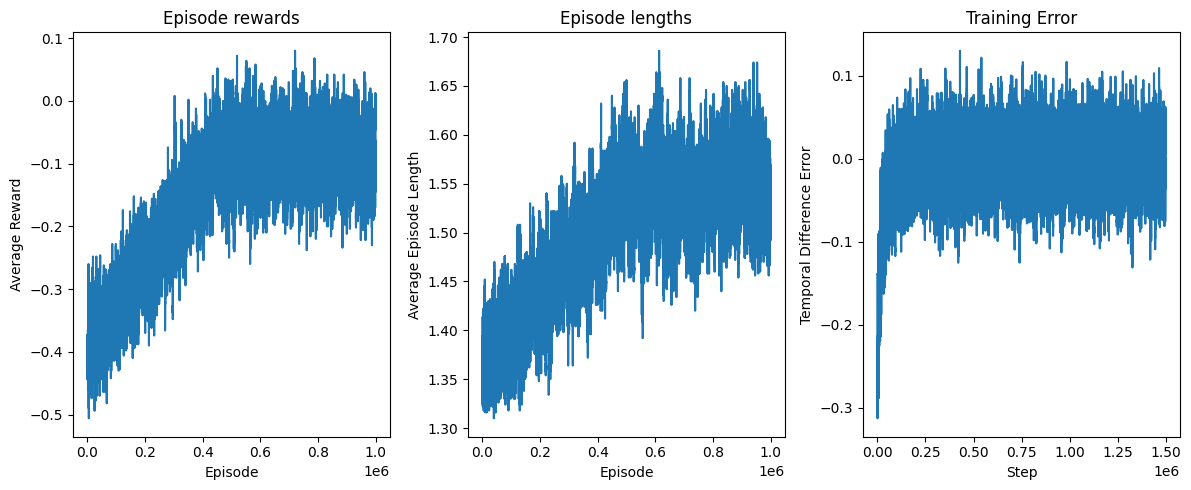

In [ ]:
from matplotlib import pyplot as plt

def get_moving_avgs(arr, window, convolution_mode):
    """Compute moving average to smooth noisy data."""
    return np.convolve(
        np.array(arr).flatten(),
        np.ones(window),
        mode=convolution_mode
    ) / window

# Smooth over a 500-episode window
rolling_length = 500
fig, axs = plt.subplots(ncols=3, figsize=(12, 5))

# Episode rewards (win/loss performance)
axs[0].set_title("Episode rewards")
reward_moving_average = get_moving_avgs(
    env.return_queue,
    rolling_length,
    "valid"
)
axs[0].plot(range(len(reward_moving_average)), reward_moving_average)
axs[0].set_ylabel("Average Reward")
axs[0].set_xlabel("Episode")

# Episode lengths (how many actions per hand)
axs[1].set_title("Episode lengths")
length_moving_average = get_moving_avgs(
    env.length_queue,
    rolling_length,
    "valid"
)
axs[1].plot(range(len(length_moving_average)), length_moving_average)
axs[1].set_ylabel("Average Episode Length")
axs[1].set_xlabel("Episode")

# Training error (how much we're still learning)
axs[2].set_title("Training Error")
training_error_moving_average = get_moving_avgs(
    agent.training_error,
    rolling_length,
    "same"
)
axs[2].plot(range(len(training_error_moving_average)), training_error_moving_average)
axs[2].set_ylabel("Temporal Difference Error")
axs[2].set_xlabel("Step")

plt.tight_layout()
plt.show()

# Play with the agent

In [ ]:
def test_agent(agent, env, num_episodes=1000):
    """Test agent performance without learning or exploration."""
    total_rewards = []

    # Temporarily disable exploration for testing
    old_epsilon = agent.epsilon
    agent.epsilon = 0.0  # Pure exploitation

    for _ in range(num_episodes):
        obs, info = env.reset()
        episode_reward = 0
        done = False

        while not done:
            action = agent.get_action(obs)
            obs, reward, terminated, truncated, info = env.step(action)
            episode_reward += reward
            done = terminated or truncated

        total_rewards.append(episode_reward)

    # Restore original epsilon
    agent.epsilon = old_epsilon

    win_rate = np.mean(np.array(total_rewards) > 0)
    average_reward = np.mean(total_rewards)

    print(f"Test Results over {num_episodes} episodes:")
    print(f"Win Rate: {win_rate:.1%}")
    print(f"Average Reward: {average_reward:.3f}")
    print(f"Standard Deviation: {np.std(total_rewards):.3f}")

# Test your agent
test_agent(agent, env)

Test Results over 1000 episodes:
Win Rate: 44.6%
Average Reward: -0.010
Standard Deviation: 0.950


# Clean up

In [ ]:
env.close()